<a href="https://colab.research.google.com/github/Aadhimozhi/Anomaly_Detection/blob/main/o_t_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy.random import randint
from numpy.random import rand

In [2]:
def objective(x):
    return x[0]**2.0 + x[1]**2.0

def decode(bounds, n_bits, bitstring):
    decoded = list()
    largest = 2**n_bits
    for i in range(len(bounds)):
        start, end = i * n_bits, (i * n_bits) + n_bits
        substring = bitstring[start:end]
        chars = ''.join([str(s) for s in substring])
        integer = int(chars, 2)
        value = bounds[i][0] + (integer / largest) * (bounds[i][1] - bounds[i][0])
        decoded.append(value)
    return decoded

def selection(pop, scores, k=3):
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k - 1):
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

def crossover(p1, p2, r_cross):
    c1, c2 = p1.copy(), p2.copy()
    if rand() < r_cross:
        pt = randint(1, len(p1) - 2)
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        if rand() < r_mut:
            bitstring[i] = 1 - bitstring[i]

def genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut):
    pop = [randint(0, 2, n_bits * len(bounds)).tolist() for _ in range(n_pop)]
    best, best_eval = 0, objective(decode(bounds, n_bits, pop[0]))
    for gen in range(n_iter):
        decoded = [decode(bounds, n_bits, p) for p in pop]
        scores = [objective(d) for d in decoded]
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">iteration %d, new best f(%s) = %f" % (gen, decoded[i], scores[i]))
        selected = [selection(pop, scores) for _ in range(n_pop)]
        children = list()
        for i in range(0, n_pop, 2):
            p1, p2 = selected[i], selected[i + 1]
            for c in crossover(p1, p2, r_cross):
                mutation(c, r_mut)
                children.append(c)
        pop = children
    return [best, best_eval]

bounds = [[-5.0, 5.0], [-5.0, 5.0]]
n_iter = 100
n_bits = 16
n_pop = 100
r_cross = 0.9
r_mut = 1.0 / (float(n_bits) * len(bounds))

print(f'Starting genetic algorithm\n')
best, score = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
decoded = decode(bounds, n_bits, best)
print(f'\nGenetic algorithm completed\n')
print(f'Best solution: {decoded}')
print(f'Fitness score of the best solution: {score:.5f}')

Starting genetic algorithm

>iteration 0, new best f([1.301422119140625, 0.368804931640625]) = 1.829717
>iteration 0, new best f([-0.449981689453125, -1.168975830078125]) = 1.568988
>iteration 0, new best f([-0.771484375, 0.7415771484375]) = 1.145125
>iteration 1, new best f([-0.771484375, 0.706634521484375]) = 1.094520
>iteration 1, new best f([0.0189208984375, -0.9637451171875]) = 0.929163
>iteration 2, new best f([-0.43212890625, 0.368804931640625]) = 0.322752
>iteration 3, new best f([0.177764892578125, -0.165557861328125]) = 0.059010
>iteration 4, new best f([0.059967041015625, -0.17303466796875]) = 0.033537
>iteration 6, new best f([0.0164794921875, -0.165557861328125]) = 0.027681
>iteration 7, new best f([-0.147705078125, -0.038604736328125]) = 0.023307
>iteration 7, new best f([0.060577392578125, -0.007476806640625]) = 0.003726
>iteration 8, new best f([0.032958984375, -0.005035400390625]) = 0.001112
>iteration 10, new best f([0.0213623046875, -0.015869140625]) = 0.000708
>iter

In [3]:
from numpy.random import randint
from numpy.random import rand
def onemax(x):
    return -sum(x)

def selection(pop, scores, k=3):
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k-1):
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

def crossover(p1, p2, r_cross):
    c1, c2 = p1.copy(), p2.copy()
    if rand() < r_cross:
        pt = randint(1, len(p1)-2)
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        if rand() < r_mut:
            bitstring[i] = 1 - bitstring[i]

def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut):
    pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
    best, best_eval = 0, objective(pop[0])
    for gen in range(n_iter):
        scores = [objective(c) for c in pop]
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">iteration %d, new best f(%s) = %.3f" % (gen, pop[i], scores[i]))
        selected = [selection(pop, scores) for _ in range(n_pop)]
        children = list()
        for i in range(0, n_pop, 2):
            p1, p2 = selected[i], selected[i+1]
            for c in crossover(p1, p2, r_cross):
                mutation(c, r_mut)
                children.append(c)
        pop = children
    return [best, best_eval]

n_iter = 100
n_bits = 20
n_pop = 100
r_cross = 0.9
r_mut = 1.0 / float(n_bits)

print(f'Starting genetic algorithm\n')
best, score = genetic_algorithm(onemax, n_bits, n_iter, n_pop, r_cross, r_mut)
print(f'\nGenetic algorithm completed\n')
print(f'Best solution: {best}')
print(f'Fitness score of the best solution: {score:.5f}')

Starting genetic algorithm

>iteration 0, new best f([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1]) = -13.000
>iteration 0, new best f([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1]) = -14.000
>iteration 0, new best f([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0]) = -17.000
>iteration 2, new best f([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]) = -18.000
>iteration 6, new best f([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = -19.000
>iteration 8, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = -20.000

Genetic algorithm completed

Best solution: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness score of the best solution: -20.00000


In [7]:
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed

def objective(x):
    return x[0]**2.0

def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
    best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    best_eval = objective(best)
    curr, curr_eval = best, best_eval
    for i in range(n_iterations):
        candidate = curr + randn(len(bounds)) * step_size
        candidate_eval = objective(candidate)
        if candidate_eval < best_eval:
            best, best_eval = candidate, candidate_eval
            print(">iteration %d: f(%s) = %.5f" % (i, best, best_eval))
        diff = candidate_eval - curr_eval
        t = temp / float(i + 1)
        metropolis = exp(-diff / t)
        if diff < 0 or rand() < metropolis:
            curr, curr_eval = candidate, candidate_eval
    return [best, best_eval]

seed(1)
bounds = asarray([[-5.0, 5.0]])
n_iterations = 1000
step_size = 0.1
temp = 10

print('Starting simulated annealing algorithm\n')
best, score = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('\nSimulated annealing completed\n')
print(f'Best solution: {best}')
print(f'Fitness score of the best solution: {score:.5f}')

Starting simulated annealing algorithm

>iteration 34: f([-0.78753544]) = 0.62021
>iteration 35: f([-0.76914239]) = 0.59158
>iteration 37: f([-0.68574854]) = 0.47025
>iteration 39: f([-0.64797564]) = 0.41987
>iteration 40: f([-0.58914623]) = 0.34709
>iteration 41: f([-0.55446029]) = 0.30743
>iteration 42: f([-0.41775702]) = 0.17452
>iteration 43: f([-0.35038542]) = 0.12277
>iteration 50: f([-0.15799045]) = 0.02496
>iteration 66: f([-0.11089772]) = 0.01230
>iteration 67: f([-0.09238208]) = 0.00853
>iteration 72: f([-0.09145261]) = 0.00836
>iteration 75: f([-0.05129162]) = 0.00263
>iteration 93: f([-0.02854417]) = 0.00081
>iteration 144: f([0.00864136]) = 0.00007
>iteration 149: f([0.00753953]) = 0.00006
>iteration 167: f([-0.00640394]) = 0.00004
>iteration 225: f([-0.00044965]) = 0.00000
>iteration 503: f([-0.00036261]) = 0.00000
>iteration 512: f([0.00013605]) = 0.00000

Simulated annealing completed

Best solution: [0.00013605]
Fitness score of the best solution: 0.00000


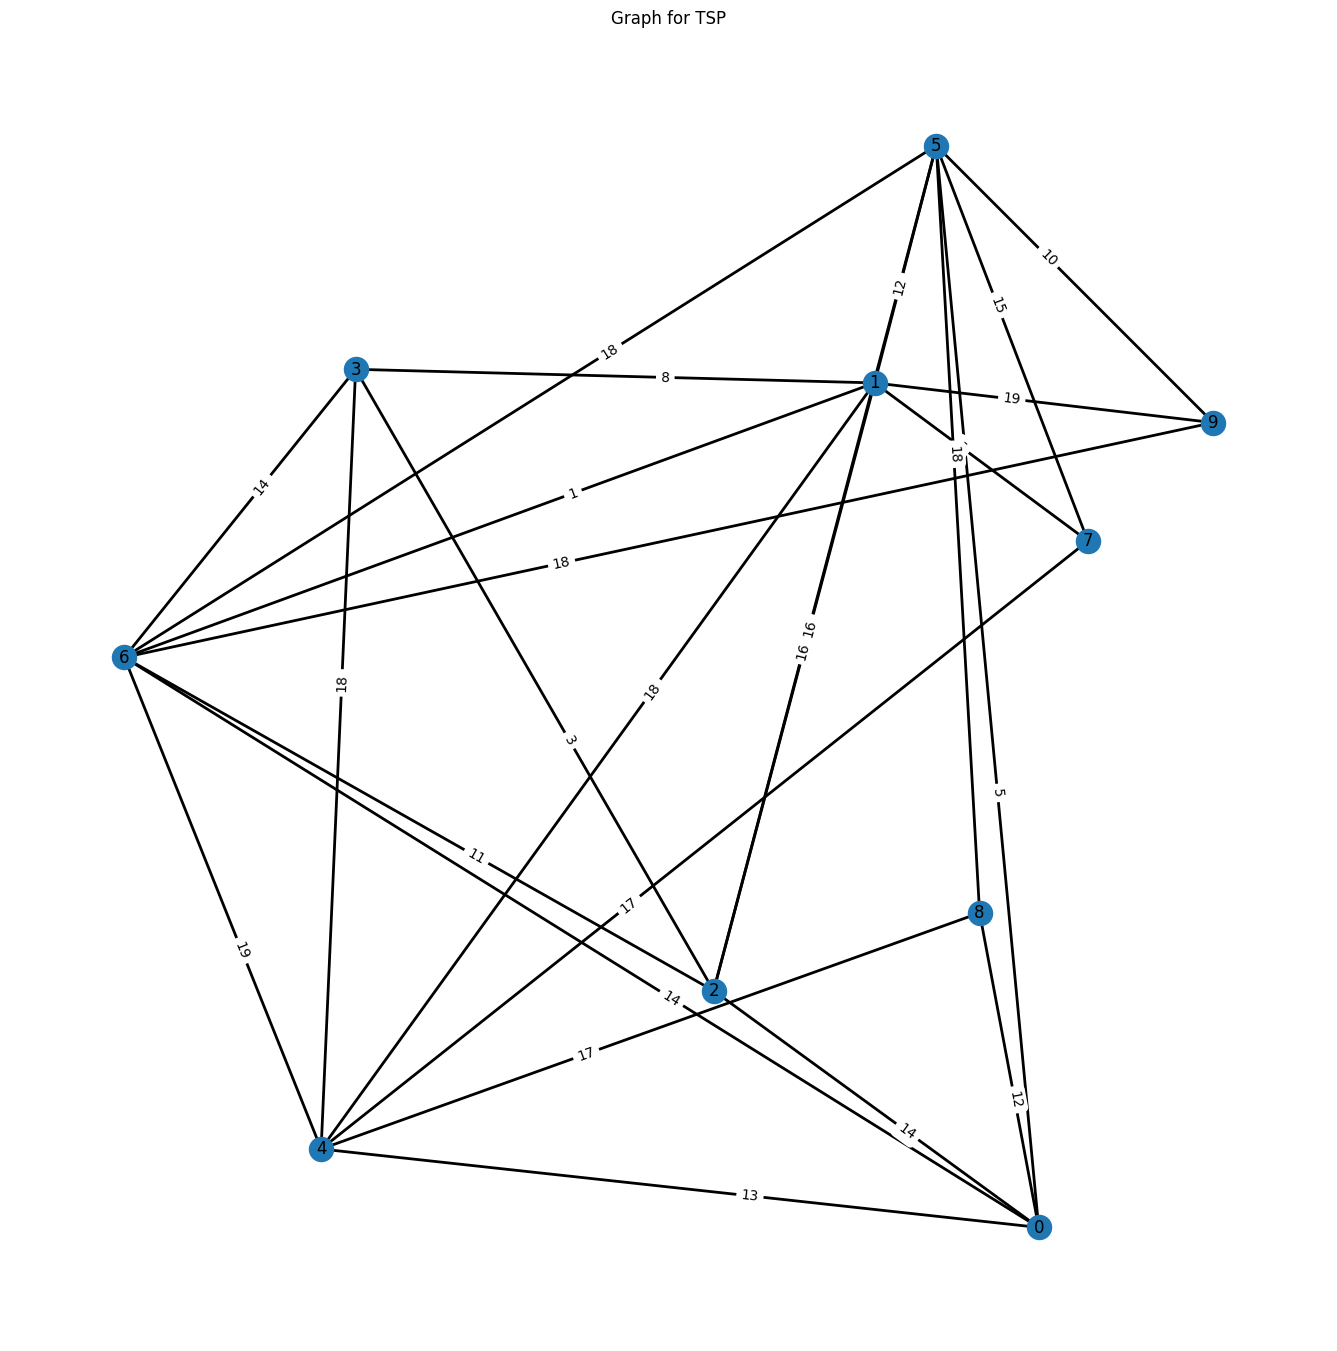

Shortest hamiltonian Path length: 91
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
Shortest hamiltonian Path length: 82
S

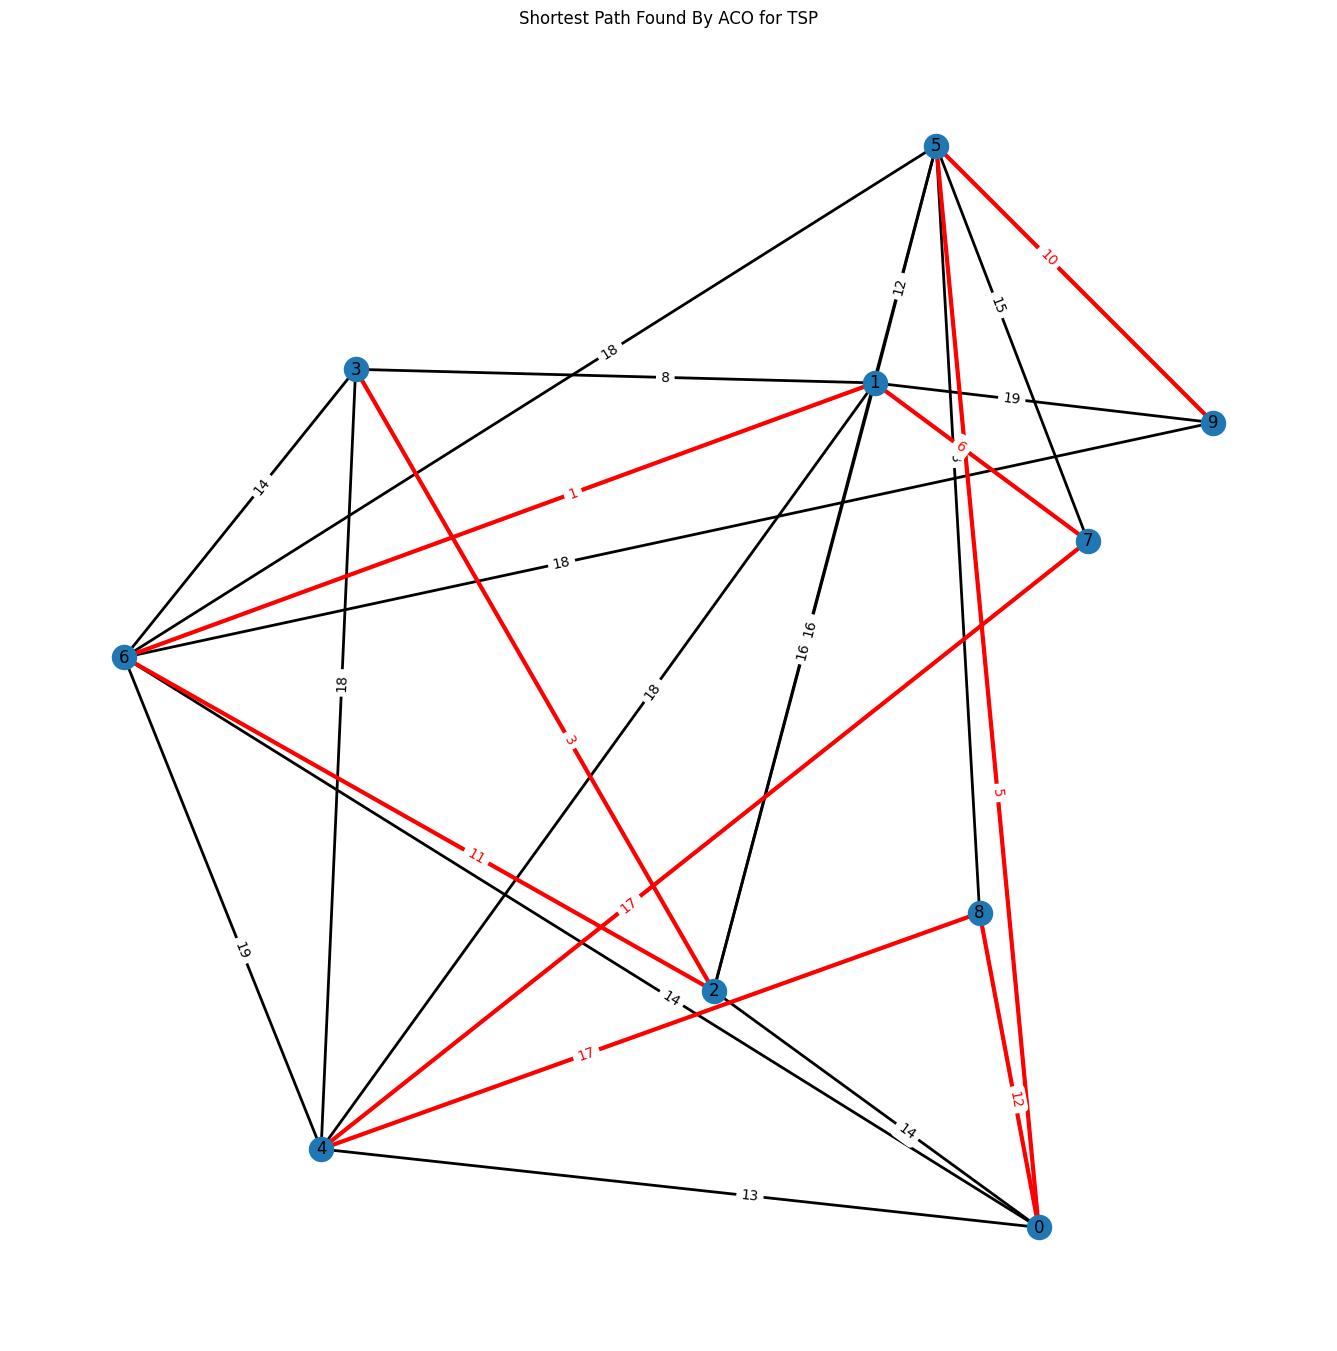

In [9]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

def generate_random_weighted_graph(n_nodes, edge_probability, min_weight, max_weight, seed=None):
    if seed is not None:
        np.random.seed(seed)

    g = nx.Graph()
    g.add_nodes_from(range(n_nodes))

    # Generate random positions for nodes
    pos = {i: (np.random.random(), np.random.random()) for i in range(n_nodes)}
    nx.set_node_attributes(g, pos, 'pos')

    # Add random edges with weights
    for i, j in combinations(range(n_nodes), 2):
        if np.random.random() < edge_probability / 100:
            weight = np.random.randint(min_weight, max_weight + 1)
            g.add_edge(i, j, weight=weight)

    return g

def plot_graph(g, title="", highlight_edges=[]):
    pos = nx.get_node_attributes(g, "pos")
    plt.figure(figsize=(17, 17))
    plt.title(title)
    nx.draw(g, pos=pos, labels={x: x for x in g.nodes}, width=2)
    weights = nx.get_edge_attributes(g, "weight")
    nx.draw_networkx_edge_labels(g, pos, edge_labels=weights, label_pos=.4)
    nx.draw_networkx_edges(g, pos, edgelist=highlight_edges, edge_color="r", width=3)
    nx.draw_networkx_edge_labels(
        g, pos,
        edge_labels={
            e: w
            for e, w in weights.items()
            if e in map(lambda x: tuple(sorted(x)), highlight_edges)
        },
        font_color="r",
        label_pos=.4
    )
    plt.show()

def zero_divide(a, b):
    return np.divide(a, b, out=np.zeros_like(a), where=b != 0)

class ACOTSP:
    def __init__(self, g, n_ants=100, alpha=1, beta=5, Q=100, rho=.6) -> None:
        self.g = g
        self.n_nodes = len(g.nodes)
        distances = nx.to_numpy_array(g)
        self.visibility = zero_divide(np.ones_like(distances), distances)
        self.n_ants = n_ants
        self.alpha = alpha
        self.beta = beta
        self.Q = Q
        self.rho = rho
        self.phe_trail = np.ones((self.n_nodes, self.n_nodes))

    def compute_prob(self, visited):
        self.prob = self.phe_trail**self.alpha * self.visibility**self.beta
        self.prob[:, np.array(list(visited))] = 0
        prob_sum = self.prob.sum(-1, keepdims=True)
        self.prob = zero_divide(self.prob, prob_sum)
        return self.prob

    def initialize(self):
        nodes = list(self.g.nodes)
        self.ant_pos = np.random.choice(nodes, self.n_ants)

    def path_length(self, path):
        edge_weights = nx.get_edge_attributes(self.g, "weight")
        return sum((edge_weights[tuple(sorted(edge))] for edge in path))

    def ant_tour(self, k):
        current = self.ant_pos[k]
        visited = {current}
        path = []
        self.compute_prob(visited)
        while True:
            prev = current
            current = np.random.choice(self.n_nodes, p=self.prob[current])
            visited.add(current)
            path.append((prev, current))
            if np.all(self.prob[current] == 0):
                break
            self.compute_prob(visited)
        self.paths[k] = path

    def update_pheromone_trails(self):
        d_phe_trail = np.zeros((self.n_nodes, self.n_nodes, self.n_ants))
        for k in range(self.n_ants):
            if len(self.paths[k]) == self.n_nodes - 1:
                for i, j in self.paths[k]:
                    d_phe_trail[i, j, k] = d_phe_trail[j, i, k] = self.Q / self.path_lengths[k]
        d_phe_trail = d_phe_trail.sum(-1)
        self.phe_trail = self.rho * self.phe_trail + d_phe_trail

    def run(self, n_iter=1):
        self.initialize()
        for t in range(n_iter):
            self.paths = [0 for _ in range(self.n_ants)]
            for k in range(self.n_ants):
                self.ant_tour(k)
            self.path_lengths = list(map(self.path_length, self.paths))
            self.update_pheromone_trails()
            self.hamiltonian_paths = [path for path in self.paths if len(path) == self.n_nodes - 1]
            self.hamiltonian_path_lengths = list(map(self.path_length, self.hamiltonian_paths))
            print(f"Shortest hamiltonian Path length: {self.min_path_length}")

    @property
    def min_path_length(self):
        try:
            return min(self.hamiltonian_path_lengths)
        except:
            return None

    @property
    def min_path(self):
        try:
            return self.hamiltonian_paths[np.argmin(self.hamiltonian_path_lengths)]
        except:
            return None

np.random.seed(3)
g = generate_random_weighted_graph(10, 50, 1, 20, seed=10)
plot_graph(g, "Graph for TSP")
acotsp = ACOTSP(g, n_ants=10, alpha=3, beta=5, Q=10, rho=.1)
acotsp.run(n_iter=50)
plot_graph(g, "Shortest Path Found By ACO for TSP", acotsp.min_path)

In [11]:
import random
import copy

def fitness_sphere(position):
    fitness_value = 0.0
    for i in range(len(position)):
        xi = position[i]
        fitness_value += (xi * xi)
    return fitness_value

class wolf:
    def __init__(self, fitness, dim, minx, maxx, seed):
        self.rnd = random.Random(seed)
        self.position = [0.0 for i in range(dim)]
        for i in range(dim):
            self.position[i] = ((maxx - minx) * self.rnd.random() + minx)
        self.fitness = fitness(self.position)

def gwo(fitness, max_iter, n, dim, minx, maxx):
    rnd = random.Random(0)
    population = [wolf(fitness, dim, minx, maxx, i) for i in range(n)]
    population = sorted(population, key=lambda temp: temp.fitness)
    alpha_wolf, beta_wolf, gamma_wolf = copy.copy(population[:3])

    Iter = 0
    while Iter < max_iter:
        if Iter % 10 == 0 and Iter > 1:
            print(f"Iter = {Iter} best fitness = {alpha_wolf.fitness:.3f} Best position = {['%.6f' % alpha_wolf.position[k] for k in range(dim)]}")

        a = 2 * (1 - Iter / max_iter)

        for i in range(n):
            A1 = a * (2 * rnd.random() - 1)
            A2 = a * (2 * rnd.random() - 1)
            A3 = a * (2 * rnd.random() - 1)
            C1 = 2 * rnd.random()
            C2 = 2 * rnd.random()
            C3 = 2 * rnd.random()

            X1 = [0.0 for i in range(dim)]
            X2 = [0.0 for i in range(dim)]
            X3 = [0.0 for i in range(dim)]
            Xnew = [0.0 for i in range(dim)]

            for j in range(dim):
                X1[j] = alpha_wolf.position[j] - A1 * abs(C1 * alpha_wolf.position[j] - population[i].position[j])
                X2[j] = beta_wolf.position[j] - A2 * abs(C2 * beta_wolf.position[j] - population[i].position[j])
                X3[j] = gamma_wolf.position[j] - A3 * abs(C3 * gamma_wolf.position[j] - population[i].position[j])
                Xnew[j] += X1[j] + X2[j] + X3[j]

            for j in range(dim):
                Xnew[j] /= 3.0

            fnew = fitness(Xnew)

            if fnew < population[i].fitness:
                population[i].position = Xnew
                population[i].fitness = fnew

        population = sorted(population, key=lambda temp: temp.fitness)
        alpha_wolf, beta_wolf, gamma_wolf = copy.copy(population[:3])
        Iter += 1

    return alpha_wolf.position

dim = 3
fitness = fitness_sphere
num_particles = 10
max_iter = 50

print(f'Starting graywolf algorithm\n')
best_position = gwo(fitness, max_iter, num_particles, dim, -10.0, 10.0)
print(f'\nGraywolf algorithm completed\n')
print(f'\nBest solution found:')
print([f"{best_position[k]:.6f}" for k in range(dim)])
err = fitness(best_position)
print(f"fitness of best solution = {err:.6f}")

Starting graywolf algorithm

Iter = 10 best fitness = 0.012 Best position = ['-0.044360', '0.084065', '-0.050042']
Iter = 20 best fitness = 0.000 Best position = ['-0.004129', '0.005473', '0.000494']
Iter = 30 best fitness = 0.000 Best position = ['-0.001647', '0.001247', '-0.000390']
Iter = 40 best fitness = 0.000 Best position = ['-0.000896', '0.001025', '-0.000212']

Graywolf algorithm completed


Best solution found:
['-0.000871', '0.000903', '-0.000206']
fitness of best solution = 0.000002


In [12]:
import pandas as pd
import random as rd
from itertools import combinations
import math

class TS():
    def __init__(self, Path, seed, tabu_tenure):
        self.Path = Path
        self.seed = seed
        self.tabu_tenure = tabu_tenure
        self.instance_dict = self.input_data()
        self.Initial_solution = self.get_InitialSolution()
        self.tabu_str, self.Best_solution, self.Best_objvalue = self.TSearch()

    def input_data(self):
        return pd.read_excel(self.Path, names=['Job', 'weight', 'processing_time', 'due_date'], index_col=0).to_dict('index')

    def get_tabuestructure(self):
        dict = {}
        for swap in combinations(self.instance_dict.keys(), 2):
            dict[swap] = {'tabu_time': 0, 'MoveValue': 0}
        return dict

    def get_InitialSolution(self):
        n_jobs = len(self.instance_dict)
        initial_solution = list(range(1, n_jobs + 1))
        rd.seed(self.seed)
        rd.shuffle(initial_solution)
        return initial_solution

    def Objfun(self, solution):
        dict = self.instance_dict
        t = 0
        objfun_value = 0
        for job in solution:
            C_i = t + dict[job]['processing_time']
            d_i = dict[job]['due_date']
            T_i = max(0, C_i - d_i)
            W_i = dict[job]['weight']
            objfun_value += W_i * T_i
            t = C_i
        return objfun_value

    def SwapMove(self, solution, i, j):
        solution = solution.copy()
        i_index = solution.index(i)
        j_index = solution.index(j)
        solution[i_index], solution[j_index] = solution[j_index], solution[i_index]
        return solution

    def TSearch(self):
        tenure = self.tabu_tenure
        tabu_structure = self.get_tabuestructure()
        best_solution = self.Initial_solution
        best_objvalue = self.Objfun(best_solution)
        current_solution = self.Initial_solution
        current_objvalue = self.Objfun(current_solution)
        iter = 1
        Terminate = 0

        while Terminate < 100:
            if iter <= 10:
                print(f'Iteration {iter}: Best_objvalue: {best_objvalue}')

            for move in tabu_structure:
                candidate_solution = self.SwapMove(current_solution, move[0], move[1])
                candidate_objvalue = self.Objfun(candidate_solution)
                tabu_structure[move]['MoveValue'] = candidate_objvalue

            while True:
                best_move = min(tabu_structure, key=lambda x: tabu_structure[x]['MoveValue'])
                MoveValue = tabu_structure[best_move]['MoveValue']
                tabu_time = tabu_structure[best_move]['tabu_time']

                if tabu_time < iter:
                    current_solution = self.SwapMove(current_solution, best_move[0], best_move[1])
                    current_objvalue = self.Objfun(current_solution)

                    if MoveValue < best_objvalue:
                        best_solution = current_solution
                        best_objvalue = current_objvalue
                        Terminate = 0
                    else:
                        Terminate += 1

                    tabu_structure[best_move]['tabu_time'] = iter + tenure
                    iter += 1
                    break
                else:
                    if MoveValue < best_objvalue:
                        current_solution = self.SwapMove(current_solution, best_move[0], best_move[1])
                        current_objvalue = self.Objfun(current_solution)
                        best_solution = current_solution
                        best_objvalue = current_objvalue
                        Terminate = 0
                        iter += 1
                        break
                    else:
                        tabu_structure[best_move]['MoveValue'] = float('inf')
                        continue

        print(f'\nTabu search completed')
        print(f'\nPerformed iterations: {iter}')
        print(f'Best found Solution: {best_solution}')
        print(f'Best found Objvalue: {best_objvalue}')
        return tabu_structure, best_solution, best_objvalue

print(f"Starting Tabu search\n")
test = TS(Path="Instance_10.xlsx", seed=2012, tabu_tenure=3)

Starting Tabu search



FileNotFoundError: [Errno 2] No such file or directory: 'Instance_10.xlsx'

In [13]:
import numpy as np

def opt_func(value):
    return np.sqrt((value ** 2).sum())

def gen_frogs(frogs, dimension, sigma, mu):
    return sigma * (np.random.randn(frogs, dimension)) + mu

def sort_frogs(frogs, mplx_no, opt_func):
    fitness = np.array(list(map(opt_func, frogs)))
    sorted_fitness = np.argsort(fitness)
    memeplexes = np.zeros((mplx_no, int(frogs.shape[0] / mplx_no)))

    for j in range(memeplexes.shape[1]):
        for i in range(mplx_no):
            memeplexes[i, j] = sorted_fitness[i + (mplx_no * j)]
    return memeplexes

def local_search(frogs, memeplex, opt_func, sigma, mu):
    frog_w = frogs[int(memeplex[-1])]
    frog_b = frogs[int(memeplex[0])]
    frog_g = frogs[0]

    frog_w_new = frog_w + (np.random.rand() * (frog_b - frog_w))

    if opt_func(frog_w_new) > opt_func(frog_w):
        frog_w_new = frog_w + (np.random.rand() * (frog_g - frog_w))

    if opt_func(frog_w_new) > opt_func(frog_w):
        frog_w_new = gen_frogs(1, frogs.shape[1], sigma, mu)[0]

    frogs[int(memeplex[-1])] = frog_w_new
    return frogs

def shuffle_memeplexes(frogs, memeplexes):
    temp = memeplexes.flatten()
    np.random.shuffle(temp)
    temp = temp.reshape((memeplexes.shape[0], memeplexes.shape[1]))
    return temp

def sfla(opt_func, frogs=30, dimension=2, sigma=1, mu=0, mplx_no=5, mplx_iters=10, solun_iters=50):
    frogs = gen_frogs(frogs, dimension, sigma, mu)
    memeplexes = sort_frogs(frogs, mplx_no, opt_func)
    best_solun = frogs[int(memeplexes[0, 0])]

    for i in range(solun_iters):
        if i % 10 == 0 and i > 1:
            print(f'Iteration {i}: best solution: {best_solun} score: {opt_func(best_solun)}')

        memeplexes = shuffle_memeplexes(frogs, memeplexes)

        for mplx_idx, memeplex in enumerate(memeplexes):
            for j in range(mplx_iters):
                frogs = local_search(frogs, memeplex, opt_func, sigma, mu)

        memeplexes = sort_frogs(frogs, mplx_no, opt_func)
        new_best_solun = frogs[int(memeplexes[0, 0])]

        if opt_func(new_best_solun) < opt_func(best_solun):
            best_solun = new_best_solun

    return best_solun, frogs, memeplexes.astype(int)

print(f"Starting shuffled frog leaping algorithm \n")
solun, frogs, memeplexes = sfla(opt_func, 100, 2, 1, 0, 5, 25, 50)
print(f"\nShuffled frog leaping algorithm completed")
print(f'\nBest solution: {solun}')
print(f'Score: {opt_func(solun)}')

Starting shuffled frog leaping algorithm 

Iteration 10: best solution: [-0.01644715 -0.14769147] score: 0.14860444251327298
Iteration 20: best solution: [-0.00554771  0.08786566] score: 0.08804062482319822
Iteration 30: best solution: [-0.00554771  0.08786566] score: 0.08804062482319822
Iteration 40: best solution: [-0.01787482  0.06238554] score: 0.06489579892913673

Shuffled frog leaping algorithm completed

Best solution: [-0.01787482  0.06238554]
Score: 0.06489579892913673


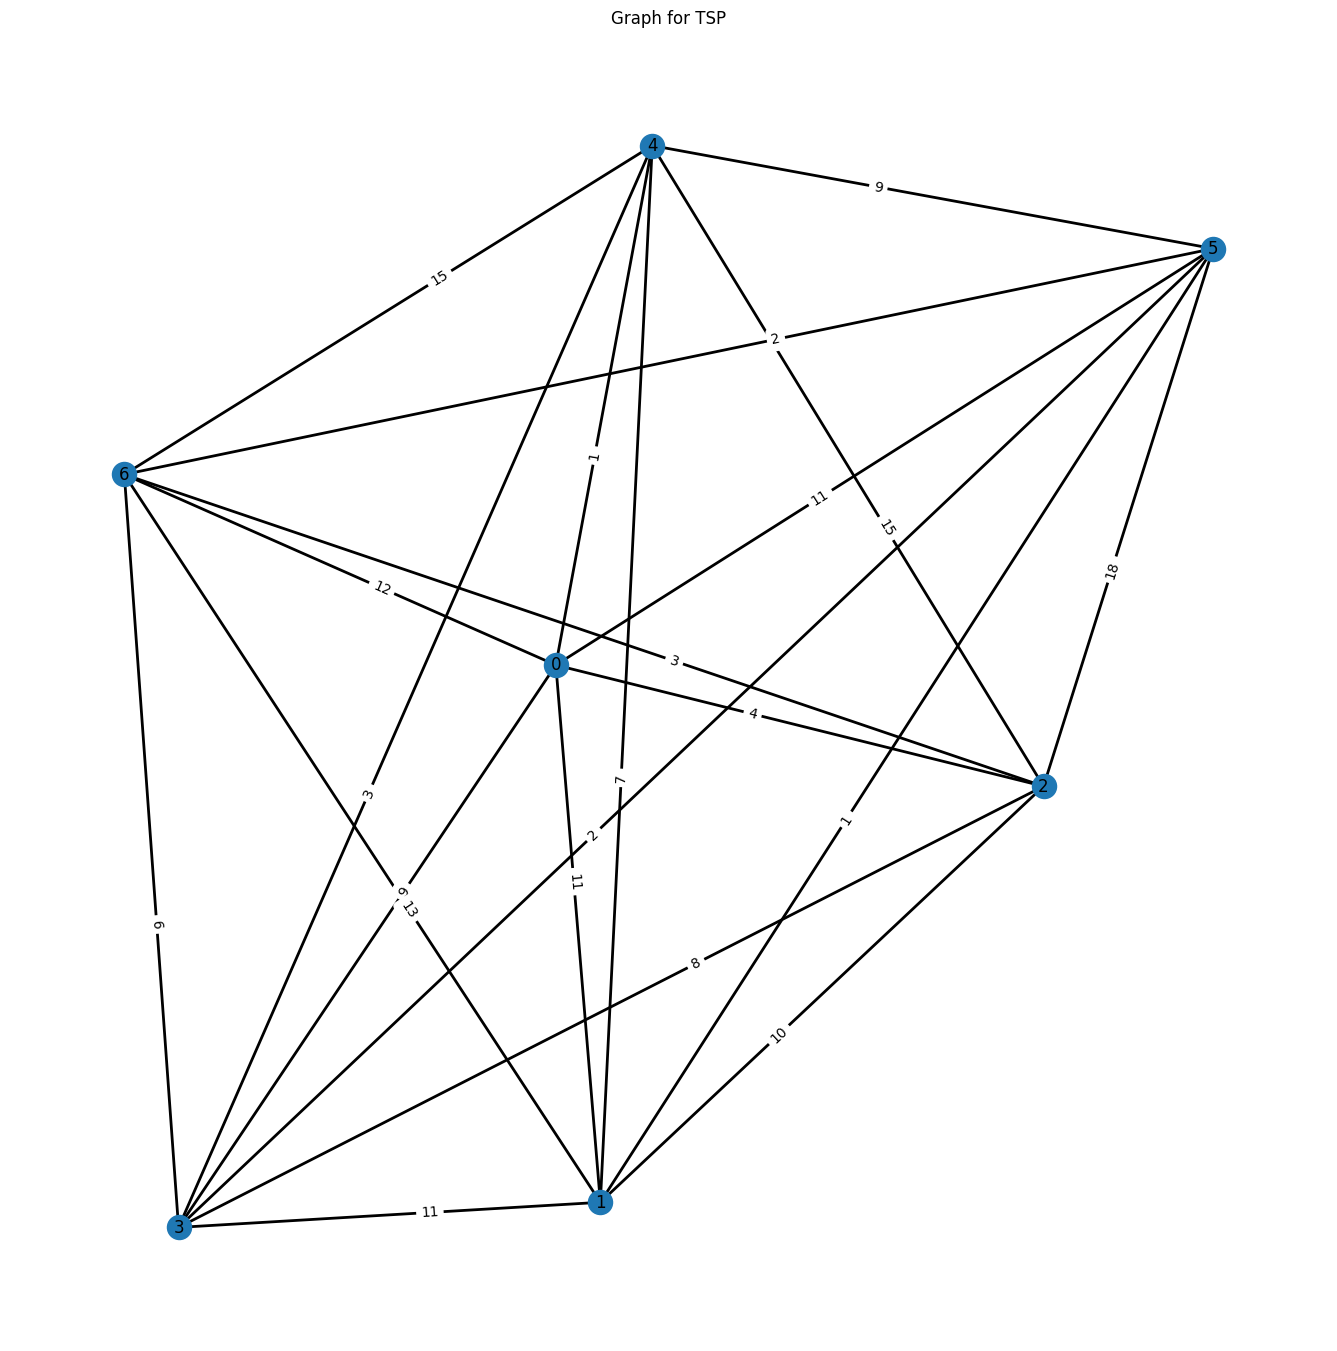

[np.int64(5), 1, 4, 0, 2, 6, 3]
[np.int64(3), 5, 1, 4, 0, 2, 6, np.int64(3)]
[3, 4, 0, 2, 6, 5, 1]
[0, 2, 6, 5, 1, 3, 4, 0]


ValueError: a must be 1-dimensional

In [14]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import defaultdict

def generate_random_weighted_graph(n, low, high):
    g = nx.generators.complete_graph(n)
    g.add_weighted_edges_from([(a, b, np.random.randint(low, high)) for a, b in g.edges()])
    nx.set_node_attributes(g, nx.spring_layout(g), "pos")
    return g

def plot_graph(g, title="", highlight_edges=[]):
    pos = nx.get_node_attributes(g, "pos")
    plt.figure(figsize=(17, 17))
    plt.title(title)
    nx.draw(g, pos=pos, labels={x: x for x in g.nodes}, width=2)
    weights = nx.get_edge_attributes(g, "weight")
    nx.draw_networkx_edge_labels(g, pos, edge_labels=weights, label_pos=.4)
    nx.draw_networkx_edges(g, pos, edgelist=highlight_edges, edge_color="r", width=3)
    nx.draw_networkx_edge_labels(
        g, pos,
        edge_labels={
            e: w
            for e, w in weights.items()
            if e in map(lambda x: tuple(sorted(x)), highlight_edges)
        },
        font_color="r",
        label_pos=.4
    )
    plt.show()

np.random.seed(3)
g = generate_random_weighted_graph(7, 1, 20)
plot_graph(g, "Graph for TSP")

def nearest_neighbour_initialization(g, closed_tour=False):
    curr_node = np.random.choice(g.nodes)
    path = [curr_node]
    not_visited = set(g.nodes) - {curr_node}
    while not_visited:
        not_visited_neighbours = not_visited & set(g.neighbors(curr_node))
        key = lambda x: g[curr_node][x]["weight"]
        curr_node = min(not_visited_neighbours, key=key)
        path.append(curr_node)
        not_visited.remove(curr_node)
    if closed_tour:
        path.append(path[0])
    return path

np.random.seed(1)
print(nearest_neighbour_initialization(g))
print(nearest_neighbour_initialization(g, closed_tour=True))

def has_cycle(g):
    try:
        nx.find_cycle(g)
    except nx.NetworkXNoCycle:
        return False
    return True

def get_path_from_edges(edges, closed_tour=False):
    path_graph = nx.Graph(edges)
    curr = min(path_graph.nodes, key=path_graph.degree)
    path, visited = [curr], {curr}
    while len(path) < len(path_graph):
        curr = (set(path_graph.neighbors(curr)) - visited).pop()
        visited.add(curr)
        path.append(curr)
    if closed_tour:
        path.append(path[0])
    return path

def shortest_edge_initialization(g, closed_tour=False):
    edge_list = set(g.edges)
    times_visited = defaultdict(int)
    tour = set()
    max_tour_len = len(g) if closed_tour else len(g) - 1
    key = nx.get_edge_attributes(g, "weight").get
    while len(tour) < max_tour_len:
        u, v = min(edge_list, key=key)
        times_visited[u] += 1
        times_visited[v] += 1
        tour.add((u, v))
        edge_list.remove((u, v))
        for u, v in set(edge_list):
            if (
                (has_cycle(nx.Graph(tour | {(u, v)})) and len(tour) != len(g) - 1)
                or times_visited[u] == 2 or times_visited[v] == 2
            ):
                edge_list.remove((u, v))
    return get_path_from_edges(tour, closed_tour=closed_tour)

np.random.seed(1)
print(shortest_edge_initialization(g))
print(shortest_edge_initialization(g, closed_tour=True))

def make_valid_tour(p, nodes):
    unvisited = set(nodes) - set(p)
    indices = defaultdict(list)
    for i in range(len(p)):
        indices[p[i]].append(i)
    visited_twice = {node for node in indices if len(indices[node]) == 2}
    for node in visited_twice:
        change_index = np.random.choice(indices[node])
        p[change_index] = unvisited.pop()
    return p

def partially_matched_crossover(p1, p2):
    pt = np.random.randint(1, len(p1) - 1)
    c1 = p1[:pt] + p2[pt:]
    c2 = p2[:pt] + p1[pt:]
    nodes = set(p1)
    return make_valid_tour(c1, nodes), make_valid_tour(c2, nodes)

def path_length(path):
    return sum(g[path[i]][path[i + 1]]["weight"] for i in range(len(path) - 1))

def roulette_wheel_selection(fitness_func, population):
    fitness_values = [1 / fitness_func(p) for p in population]
    total_fitness = sum(fitness_values)
    probabilities = [f / total_fitness for f in fitness_values]
    selected = np.random.choice(population, size=len(population), p=probabilities, replace=True)
    return selected.tolist()

np.random.seed(2)
n_population = 8
population = [shortest_edge_initialization(g, closed_tour=False) for _ in range(n_population)]
selected_population = roulette_wheel_selection(path_length, population)
parents = selected_population[:2]
print(parents)
print(partially_matched_crossover(*parents))

def order_crossover(p1, p2):
    start = np.random.randint(0, len(p1) - 1)
    end = np.random.randint(start + 1, len(p1) if start != 0 else len(p1) - 1)

    def fill_blanks(parent1, parent2, s, e):
        unvisited_nodes = parent2.copy()
        for node in parent1[s:e]:
            unvisited_nodes.remove(node)
        child = parent1.copy()
        for i in range(len(parent1)):
            if i < s or i >= e:
                child[i] = unvisited_nodes.pop(0)
        return child

    c1 = fill_blanks(p1, p2, start, end)
    c2 = fill_blanks(p2, p1, start, end)
    return c1, c2

def inv_path_length(path):
    return 1 / path_length(path)

np.random.seed(2)
n_population = 8
population = [shortest_edge_initialization(g, closed_tour=False) for _ in range(n_population)]
selected_population = roulette_wheel_selection(inv_path_length, population)
parents = selected_population[:2]
print(parents)
print(order_crossover(*parents))

def inversion_mutation(p):
    start = np.random.randint(0, len(p) - 1)
    end = np.random.randint(start + 1, len(p) + 1)
    subtour = p[start:end]
    c = p.copy()
    for i in range(start, end):
        c[i] = subtour.pop()
    return c

np.random.seed(3)
n_population = 8
population = [shortest_edge_initialization(g, closed_tour=False) for _ in range(n_population)]
subject = population[0]
print(subject, inversion_mutation(subject))

def insertion_mutation(p):
    i = np.random.randint(1, len(p))
    k = np.random.randint(0, len(p) - 1)
    c = p.copy()
    c.insert(k, c.pop(i))
    return c

n_population = 8
population = [shortest_edge_initialization(g, closed_tour=False) for _ in range(n_population)]
subject = population[0]
print(subject, insertion_mutation(subject))